# Neural Network

In [111]:
 from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
filename = '/content/drive/My Drive/데이터마이닝/HW/Week9/citrus.csv'

In [113]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sklearn

# 1. 데이터 전처리

In [114]:
dataset=pd.read_csv(filename)
dataset

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [115]:
dataset.shape

(10000, 6)

In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [117]:
dataset.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [118]:
dataset.isnull().sum() 

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [119]:
features = dataset.iloc[:,1:]
target = pd.DataFrame([1 if each=="orange" else 0 for each in dataset["name"]],columns=["features"])

In [120]:
from sklearn.model_selection import train_test_split
train_features, test_features , train_labels, test_labels = train_test_split(
    features, target, test_size = 0.2, random_state = 2021)

In [121]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(8000, 5)
(8000, 1)
(2000, 5)
(2000, 1)


In [122]:
print(type(train_features))
print(type(test_labels))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [123]:
pd.DataFrame(train_features.copy())

,diameter,weight,red,green,blue
7622,11.53,198.61,152,74,24
5189,9.31,162.50,167,79,22
4584,10.22,178.66,158,99,2
3465,9.09,162.18,168,73,2
4588,10.22,178.73,158,74,18
...,...,...,...,...,...
3934,9.47,168.02,154,89,7
2669,8.59,154.02,150,77,2
1152,7.57,139.05,147,84,5
6201,10.63,183.64,165,75,19


In [124]:
# Z-score Standardization

mean = train_features.mean(axis=0)
train_features -= mean
std = train_features.std(axis=0)
train_features /= std

In [125]:
# test data (Features)도 train의 기준으로 표준화
test_features -= mean
test_features /= std

In [126]:
# One-hot Encoding
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# 2. Modeling & Train

In [127]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

# tf.set_random_seed(2021) <- 이건 tensorflow 1 version
tf.random.set_seed(2021)



# Step 1 : 모델 구축#
model = models.Sequential() # ANN 형성

model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],))) # Hidden layer

model.add(layers.Dense(8, activation = 'relu')) # Hidden layer

model.add(layers.Dense(4, activation = 'relu')) # Hidden layer

model.add(layers.Dense(2, activation = 'sigmoid') # Output layer 생성



# Step 2 : Loss Function & Optimizer 설정#
# adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Optimizer 종류 => https://keras.io/api/optimizers/
# SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
## Adam을 가장 자주 씀


# Step 3 : 모델 Compile#
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.01),
               loss='categorical_crossentropy',
               metrics=['accuracy'])


# 콜백 함수 #
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련


# 4 #
# model.fit(train_data, train_targets, epochs=80, batch_size=16)
cls_history = model.fit(train_features, train_labels_one_hot, epochs=300, batch_size=1024, 
                        validation_split=0.2, callbacks=[es, lr]) #,callbacks=[es,lr]





from keras.models import load_model

path = '/content/drive/My Drive/데이터마이닝/HW/Week9/model/'
save_file = 'h3_16_8_4_2_RMSprop.h5'

model.save(path+save_file)

Epoch 1/300
7/7 [==============================] - 1s 30ms/step - loss: 0.6469 - accuracy: 0.6999 - val_loss: 0.4194 - val_accuracy: 0.9075
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 0.3806 - accuracy: 0.9142 - val_loss: 0.2705 - val_accuracy: 0.9306
Epoch 3/300
7/7 [==============================] - 0s 8ms/step - loss: 0.2475 - accuracy: 0.9248 - val_loss: 0.2041 - val_accuracy: 0.9269
Epoch 4/300
7/7 [==============================] - 0s 7ms/step - loss: 0.1930 - accuracy: 0.9284 - val_loss: 0.1926 - val_accuracy: 0.9306
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 0.1827 - accuracy: 0.9256 - val_loss: 0.1880 - val_accuracy: 0.9269
Epoch 6/300
7/7 [==============================] - 0s 7ms/step - loss: 0.1764 - accuracy: 0.9301 - val_loss: 0.1886 - val_accuracy: 0.9300
Epoch 7/300
7/7 [==============================] - 0s 7ms/step - loss: 0.1833 - accuracy: 0.9226 - val_loss: 0.1844 - val_accuracy: 0.9275
Epoch 8/300
7/7 [=========

In [128]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 10        
Total params: 278
Trainable params: 278
Non-trainable params: 0
_________________________________________________________________


# 모델 구조 시각화


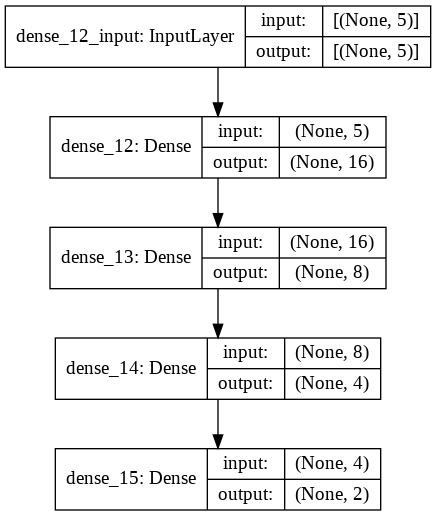

In [129]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_classification_model_shapes.png', show_shapes=True)

# 학습된 모델 weight 추출

In [130]:
pd.DataFrame(model.get_weights()[0])
# []안에 숫자를 바꿔가면서 차례로 weight와 bias를 볼 수 있음
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.707591,-0.649858,-1.342600,0.561896,-0.357449,-0.753169,1.121712,1.470213,0.913070,-1.489188,0.790740,-1.350017,-0.162967,-1.787350,1.036064,-1.384844
1,1.197320,1.620945,1.001223,-0.200550,-0.038853,1.399361,-0.137638,-1.823303,0.219455,1.061029,0.238262,0.945576,0.653099,0.903815,0.382358,0.430071
2,-0.021735,0.007454,0.013166,-0.352890,-0.102643,0.053566,-0.283340,0.007557,-0.078540,0.011136,0.135375,0.047942,0.084124,0.017857,-0.043714,-0.021528
3,-0.029671,0.010252,0.043774,-0.472310,0.267017,0.045926,-0.138627,0.051247,-0.428659,0.022746,0.250576,0.058019,-0.392275,0.052866,-0.057799,-0.000326
4,0.003415,0.071399,-0.012636,0.321151,-0.060988,-0.214036,0.279910,-0.037344,0.173112,-0.001905,-0.206271,-0.152534,0.187937,-0.158663,0.551321,0.174018


In [131]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

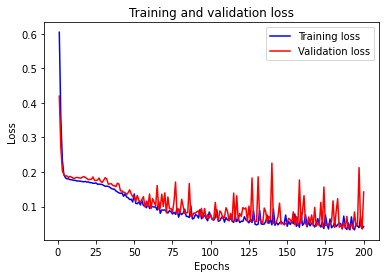

In [132]:
import matplotlib.pyplot as plt

cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

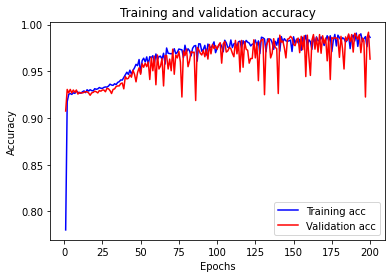

In [133]:
plt.clf()
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [134]:
test_loss, test_acc = model.evaluate(test_features, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

63/63 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9875
test loss: 0.04455030709505081
test_accuracy: 0.987500011920929


# 3. 모델 Save 및 Load, 성능 확인

In [184]:
from keras.models import load_model

path = '/content/drive/My Drive/데이터마이닝/HW/Week9/model/'
save_file = 'h2_4_4.h5'

#model.save(path+save_file)

model = load_model(path+save_file)


test_loss, test_acc = model.evaluate(test_features, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)


63/63 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9785
test loss: 0.056997403502464294
test_accuracy: 0.9785000085830688


In [185]:
pd.DataFrame(model.get_weights()[0])

,0,1,2,3
0,-2.311687,1.026105,-1.992417,0.738000
1,1.360328,-2.114043,1.599887,0.670607
2,-0.014536,0.003111,0.003726,-0.161186
3,-0.002758,0.006744,0.002749,-0.440520
4,0.003648,-0.009521,-0.000626,0.378742


In [186]:
y_pred = model.predict(test_features)

In [187]:
from sklearn.metrics import r2_score
print('test R squared: %.3f' % r2_score(test_labels_one_hot, y_pred))

test R squared: 0.936
